In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from dotenv import load_dotenv
load_dotenv()

# # Settings to produce nice plots in a Jupyter notebook
# plt.style.use('fivethirtyeight')
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [12, 6]

# To extract and parse fundamental data from finviz website
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)
    data = response.read().decode("utf-8")
    return json.loads(data)

#financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

# Financial Modeling Prep API demo version only provides AAPL
apiKey = os.getenv('apiKey')
ticker = 'HRL'

q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2023-07-30,NaN,2023,NaN,162571000,74754000,206000,5034000,73678000,-24706000,6774000,...,-144238000,-6715000,88628000,669124000,580496000,317001000,-77678000,239323000,NaN,NaN
2023-04-30,NaN,2023,NaN,217215000,70785000,-168000,10710000,-85487000,26568000,-15544000,...,-165169000,-2651000,-19293000,580496000,599789000,208126000,-53510000,154616000,NaN,NaN
2023-01-29,NaN,2023,NaN,217651000,70893000,-311000,5202000,-67564000,79561000,-11766000,...,-141570000,7093000,-382318000,599789000,982107000,203629000,-32036000,171593000,NaN,NaN
2022-10-30,NaN,2022,NaN,280011000,71185000,105573000,4010000,-101510000,-68309000,-40351000,...,-142221000,-11625000,131763000,982107000,850344000,371820000,-89555000,282265000,NaN,NaN


In [2]:
# Annual Cash Flows
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

# Combine TTM CF with Annual Cash Flows
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_13216\3417539757.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)


,acceptedDate,calendarYear,period,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,0.0,8091.0,0.0,287617000.0,105300000.0,24956000.0,-180883000.0,13114000.0,-60887000.0,-61331000.0,...,-5.931980e+08,-13898000.0,-1.812200e+08,2.831516e+09,3.012736e+09,1.100576e+09,-252779000.0,847797000.0,0.0,0.0
2022-10-30,NaN,2022.0,NaN,262753000.0,177000000.0,24943000.0,-371792000.0,28365000.0,-351663000.0,-14511000.0,...,-4.866840e+08,-21679000.0,3.685770e+08,9.821070e+08,6.135300e+08,1.134977e+09,-277694000.0,857283000.0,NaN,NaN
2021-10-31,NaN,2021.0,NaN,228406000.0,28677000.0,24744000.0,-165786000.0,-191627000.0,-145176000.0,115099000.0,...,1.520520e+09,2606000.0,-1.100779e+09,6.135300e+08,1.714309e+09,1.001934e+09,-230200000.0,771734000.0,NaN,NaN
2020-10-25,NaN,2020.0,NaN,205781000.0,32039000.0,22458000.0,-29013000.0,-119516000.0,-1839000.0,111277000.0,...,5.661720e+08,3526000.0,1.041408e+09,1.714309e+09,6.729010e+08,1.128024e+09,-367501000.0,760523000.0,NaN,NaN
2019-10-27,NaN,2019.0,NaN,165209000.0,28641000.0,19707000.0,-221361000.0,-11146000.0,-123843000.0,-44109000.0,...,-9.262440e+08,-3140000.0,2.137650e+08,6.729010e+08,4.591360e+08,9.229960e+08,-256436000.0,666560000.0,NaN,NaN


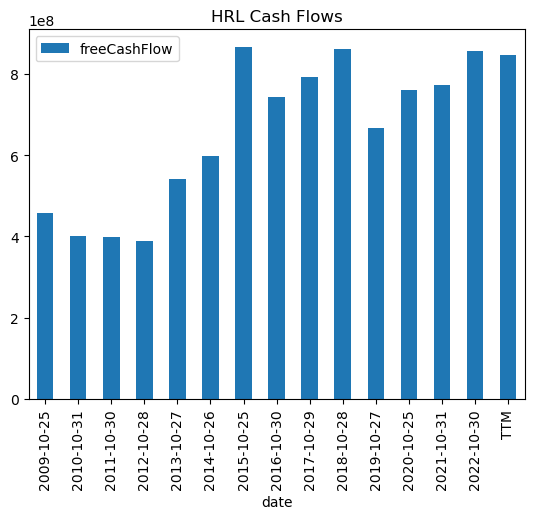

In [3]:
# Check Stability of FCF
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

In [4]:
# Quarterly Balance Sheet
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2023-07-30,NaN,2023,NaN,669124000,17423000,686547000,793744000,1737865000,36614000,3254770000,...,7717863000,7717863000,13431355000,4598000,13431355000,760897000,3307361000,2638237000,NaN,NaN
2023-04-30,NaN,2023,NaN,580496000,17531000,598027000,769128000,1745793000,49648000,3162596000,...,7691615000,7691615000,13315745000,5108000,13315745000,759821000,3303394000,2722898000,NaN,NaN
2023-01-29,NaN,2023,NaN,599789000,17792000,617581000,794358000,1730086000,53281000,3195306000,...,7618993000,7618993000,13283047000,5089000,13283047000,287207000,3301488000,2701699000,NaN,NaN
2022-10-30,NaN,2022,NaN,982107000,16149000,998256000,874770000,1716059000,-1000,3637125000,...,7540219000,7540219000,13311855000,4936000,13311855000,287207000,3299345000,2317238000,NaN,NaN
2022-07-31,NaN,2022,NaN,850344000,18314000,868658000,810583000,1679179000,1000,3403484000,...,7361676000,7361676000,13140418000,5272000,13140418000,296041000,3303094000,2452750000,NaN,NaN


In [5]:
# Free Cash Flow, Total Debt, Cash & Short Term Investments
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  847797000.0
Total Debt:  3307361000.0
Cash and ST Investments:  686547000.0


In [6]:
# Retrieve other data points needed to calculate and evaluate intrinsic value
# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

# Update the function to pass the correct 'symbol' parameter
def get_finviz_data(ticker):
    dict_finviz = {}  # Initialize an empty dictionary
    try:
        # Use the 'ticker' parameter instead of 'symbol'
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        req = Request(url=url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
        response = urlopen(req)
        soup = BeautifulSoup(response, 'html.parser')  # Specify the parser explicitly
        for m in metric:
            dict_finviz[m] = fundamental_metric(soup, m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1] == '%'):
                dict_finviz[key] = float(value[:-1])
            # billion
            elif (value[-1] == 'B'):
                dict_finviz[key] = float(value[:-1]) * 1e9
            # million
            elif (value[-1] == 'M'):
                dict_finviz[key] = float(value[:-1]) * 1e6
            else:
                try:
                    dict_finviz[key] = float(value)
                except ValueError:
                    pass
    except Exception as e:
        print(e)
        print('Not successful parsing ' + ticker + ' data.')
    return dict_finviz

# Define 'ticker' variable
# ticker = 'AAPL'  # Replace with the desired stock ticker symbol

# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

# Call the function to get data for the specified ticker
finviz_data = get_finviz_data(ticker)

# Print the retrieved data
for key, value in finviz_data.items():
    print(f'{key}: {value}')

Price: 38.41
EPS next 5Y: 4.5
Beta: 0.19
Shs Outstand: 546360000.0


C:\Users\Owner\AppData\Local\Temp\ipykernel_13216\2928349951.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  return soup.find(text = metric).find_next(class_='snapshot-td2').text


In [8]:
# Estimate Discount Rate
Beta = finviz_data['Beta']

# discount_rate = 7
# if(Beta<0.80):
#     discount_rate = 5
# elif(Beta>=0.80 and Beta<1):
#     discount_rate = 6
# elif(Beta>=1 and Beta<1.1):
#     discount_rate = 6.5
# elif(Beta>=1.1 and Beta<1.2):
#     discount_rate = 7
# elif(Beta>=1.2 and Beta<1.3):
#     discount_rate =7.5
# elif(Beta>=1.3 and Beta<1.4):
#     discount_rate = 8
# elif(Beta>=1.4 and Beta<1.6):
#     discount_rate = 8.5
# elif(Beta>=1.61):
#     discount_rate = 9   
discount_rate = 8
    
print("Discount Rate: ", discount_rate)

Discount Rate:  8


In [9]:
# Print elements for Intrinsic Value Calc

EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 4)  # Slightly higher than long term inflation rate, conservative estimate

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  847797000.0
Total Debt:  3307361000.0
Cash and ST Investments:  686547000.0
EPS Growth 5Y:  4.5
EPS Growth 6Y to 10Y:  2.25
EPS Growth 11Y to 20Y:  2.25
Discount Rate:  8
Shares Outstanding:  546360000.0


Discounted Cash Flows

Year 1: $820322097.2222221
Year 2: $793737584.8122426
Year 3: $768014607.5266606
Year 4: $743125245.2457039
Year 5: $719042482.6682967
Year 6: $680760128.2669753
Year 7: $644515954.7712797
Year 8: $610201447.9200311
Year 9: $577713870.831696
Year 10: $546955956.4124159
Year 11: $517835616.1404585
Year 12: $490265664.3552026
Year 13: $464163557.2251802
Year 14: $439451145.6136544
Year 15: $416054441.10181624
Year 16: $393903394.4690806
Year 17: $372931685.9672545
Year 18: $353076526.7606646
Year 19: $334278470.9377588
Year 20: $316481237.53135026


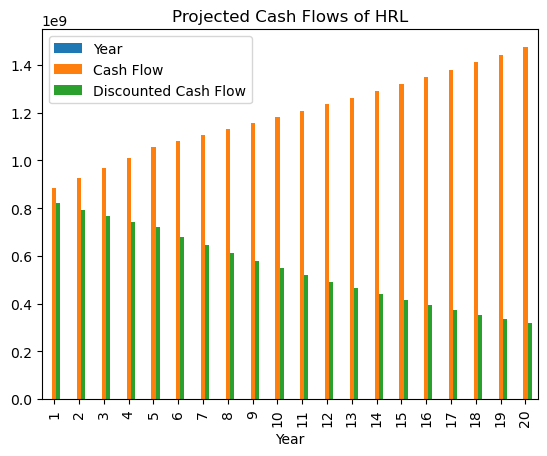

In [10]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value


intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate)   

In [11]:

print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)    

Intrinsic Value:  15.341564382055687
Current Price:  38.41
Margin of Safety:  -150.36560186082707
